In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## EDA

In [5]:
data.drop(data.columns[11:30],axis=1, inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [8]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [7]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,512,513,514,515,516
month,mar,oct,oct,mar,mar,aug,aug,aug,sep,sep,...,aug,aug,aug,aug,aug,aug,aug,aug,aug,nov
day,fri,tue,sat,fri,sun,sun,mon,mon,tue,sat,...,fri,fri,fri,fri,sun,sun,sun,sun,sat,tue
FFMC,86.2,90.6,90.6,91.7,89.3,92.3,92.3,91.5,91.0,92.5,...,91.0,91.0,91.0,91.0,81.6,81.6,81.6,81.6,94.4,79.5
DMC,26.2,35.4,43.7,33.3,51.3,85.3,88.9,145.4,129.5,88.0,...,166.9,166.9,166.9,166.9,56.7,56.7,56.7,56.7,146.0,3.0
DC,94.3,669.1,686.9,77.5,102.2,488.0,495.6,608.2,692.6,698.6,...,752.6,752.6,752.6,752.6,665.6,665.6,665.6,665.6,614.7,106.7
ISI,5.1,6.7,6.7,9.0,9.6,14.7,8.5,10.7,7.0,7.1,...,7.1,7.1,7.1,7.1,1.9,1.9,1.9,1.9,11.3,1.1
temp,8.2,18.0,14.6,8.3,11.4,22.2,24.1,8.0,13.1,22.8,...,25.9,25.9,21.1,18.2,27.8,27.8,21.9,21.2,25.6,11.8
RH,51,33,33,97,99,29,27,86,63,40,...,41,41,71,62,35,32,71,70,42,31
wind,6.7,0.9,1.3,4.0,1.8,5.4,3.1,2.2,5.4,4.0,...,3.6,3.6,7.6,5.4,2.7,2.7,5.8,6.7,4.0,4.5
rain,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [10]:
data.isnull()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
512,False,False,False,False,False,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,False,False
514,False,False,False,False,False,False,False,False,False,False,False,False
515,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

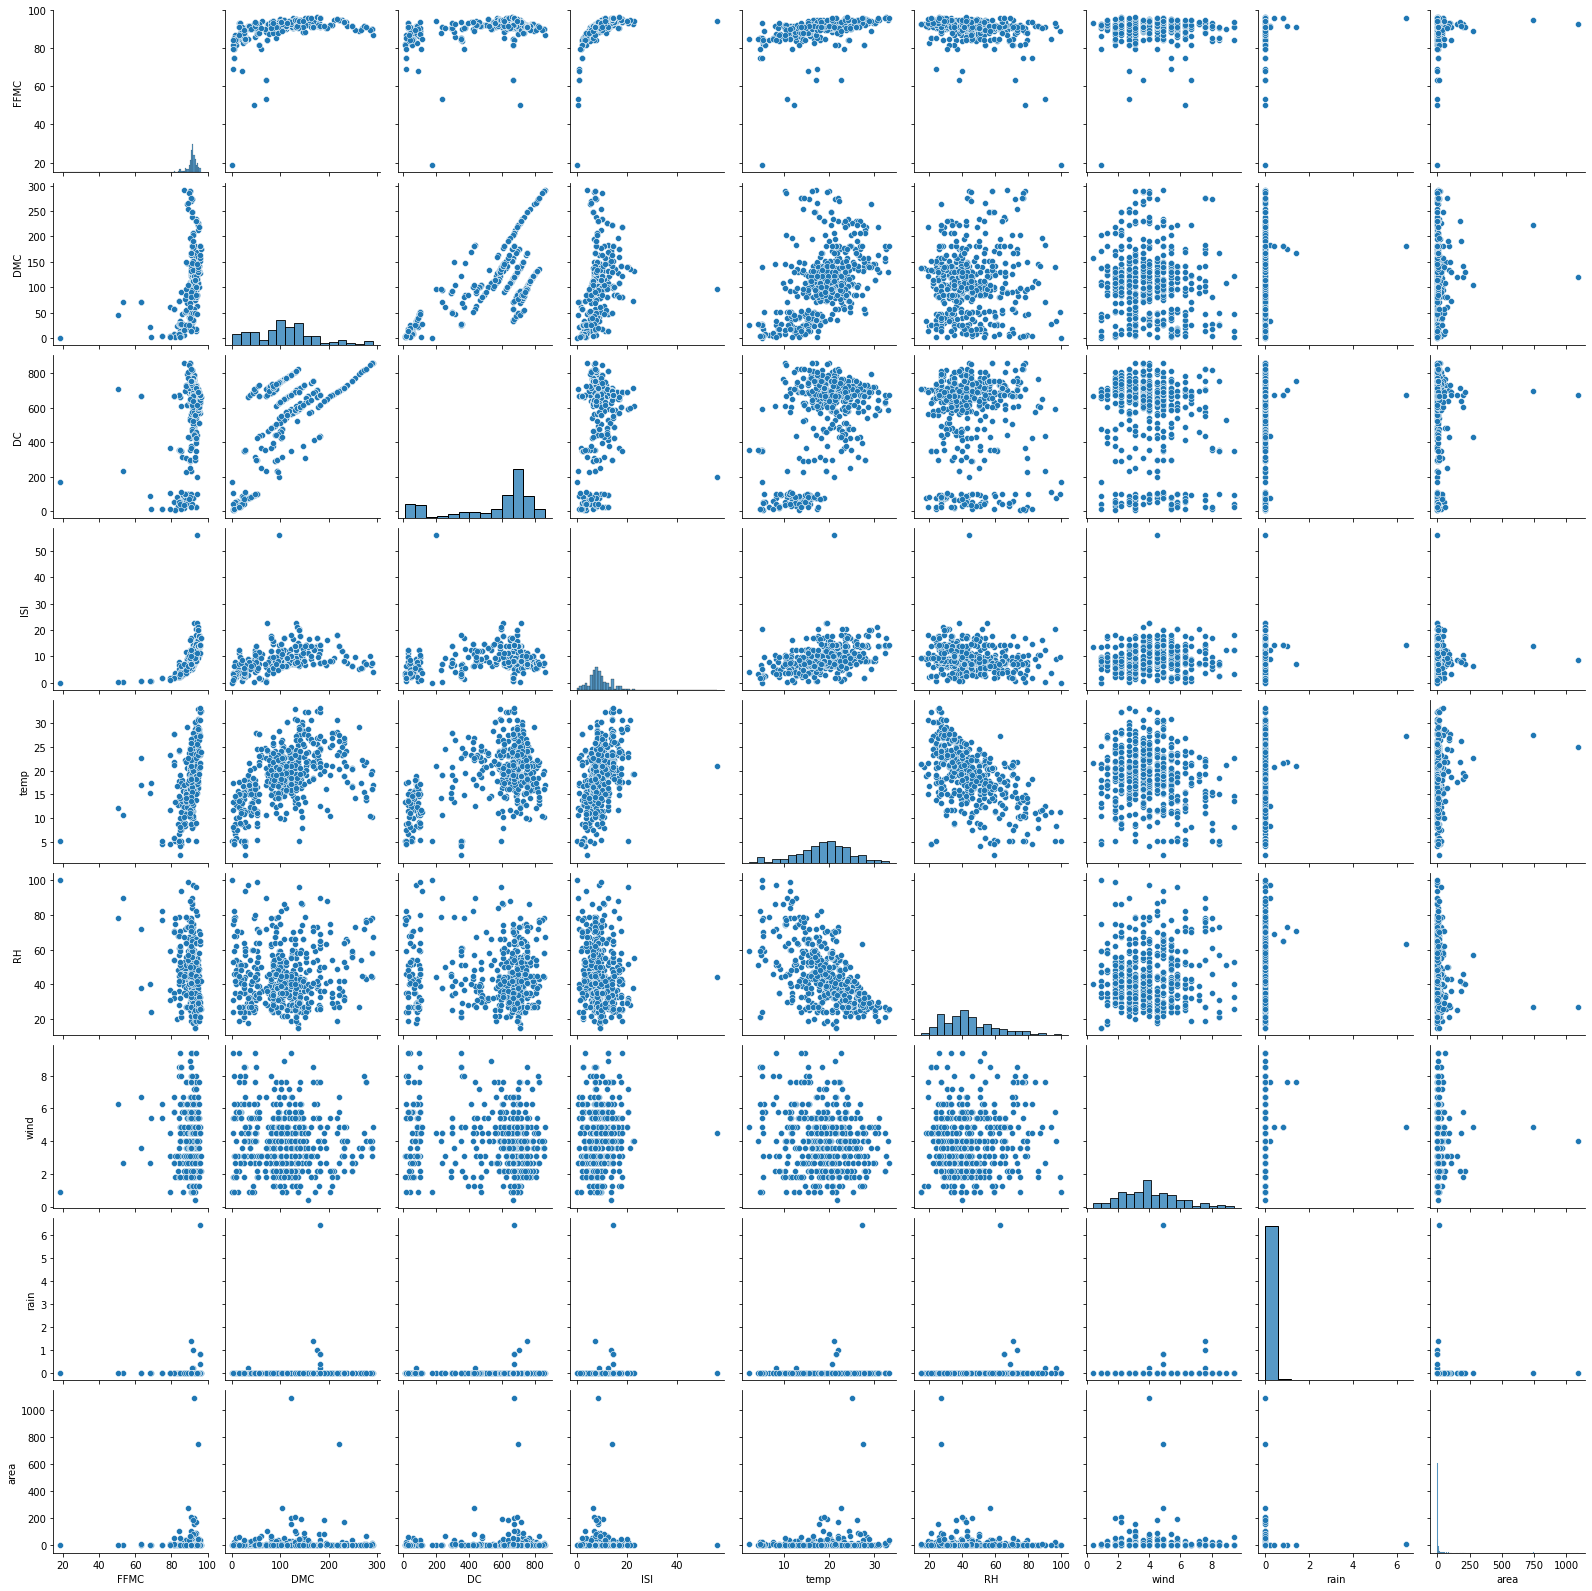

In [12]:
import seaborn as sns
sns.pairplot(data)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


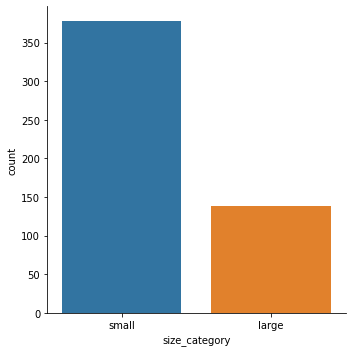

In [31]:
import matplotlib.pyplot as plt
sns.factorplot ('size_category', data=data, kind='count', size=5)
plt.show()

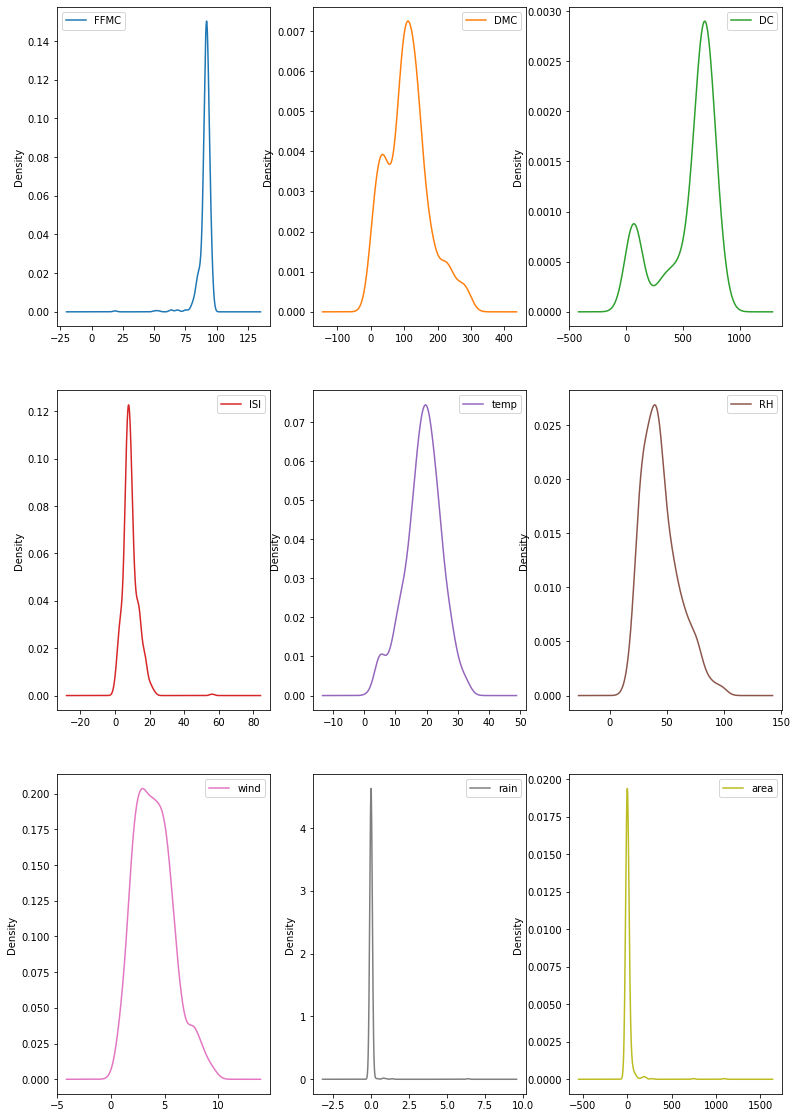

In [46]:
data.plot(kind='density', subplots = True, layout = (3,3), figsize=(13,20), sharex = False, sharey = False)
plt.show()

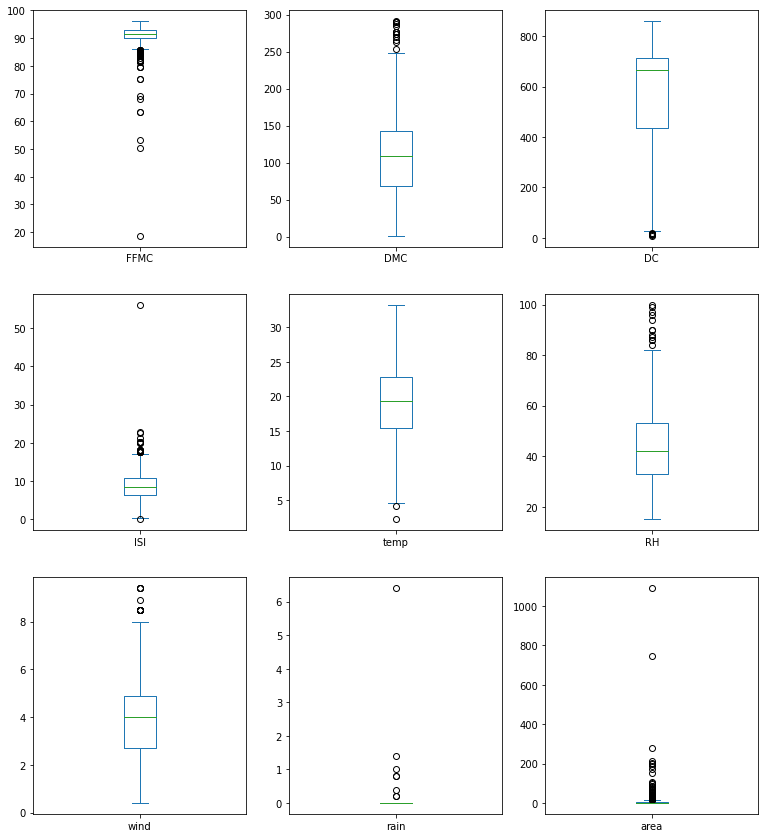

In [45]:
data.plot(kind='box', subplots = True, layout = (4,3), figsize = (13,20), sharex = False, sharey = False)
plt.show()

### Finding corelation between variables

In [47]:
data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


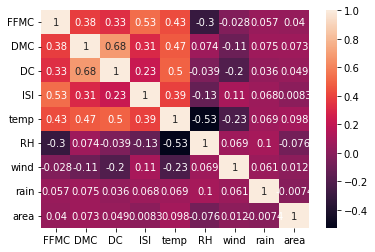

In [51]:
sns.heatmap(data.corr(), annot = True)

### PCA

In [55]:
data_1= data.drop(['month', 'day', 'size_category'], axis=1)
data_1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [58]:
# normalizing the data
sc.fit(data_1)
data_norm = sc.transform(data_1)
data_norm

array([[-0.80595947, -1.32332557, -1.83047676, ...,  1.49861442,
        -0.07326831, -0.20201979],
       [-0.00810203, -1.17954077,  0.48889092, ..., -1.74175564,
        -0.07326831, -0.20201979],
       [-0.00810203, -1.04982188,  0.56071545, ..., -1.51828184,
        -0.07326831, -0.20201979],
       ...,
       [-1.64008316, -0.84664771,  0.47476811, ...,  1.49861442,
        -0.07326831, -0.02653216],
       [ 0.68095666,  0.54900254,  0.26938221, ..., -0.00983371,
        -0.07326831, -0.20201979],
       [-2.02087875, -1.68591332, -1.78044169, ...,  0.26950853,
        -0.07326831, -0.20201979]])

In [64]:
data_1.shape

(517, 9)

In [65]:
#Apply PCA to fit transform to dataset
from sklearn.decomposition import PCA
pca = PCA(n_components = 9)
pca_values = pca.fit_transform(data_1)
pca_values

array([[ 4.61747148e+02, -6.74535401e+00, -1.17997279e+00, ...,
         1.33014993e+00, -1.60040997e+00,  8.24819971e-03],
       [-1.05454350e+02, -2.15880466e+01, -9.51410943e+01, ...,
        -1.02824558e+00,  2.67948309e+00,  7.79368621e-02],
       [-1.24411387e+02, -2.14888977e+01, -9.02460405e+01, ...,
         8.70519359e-01,  2.75884441e+00,  1.13514580e-01],
       ...,
       [-1.05846197e+02, -9.45339870e+00, -7.26187305e+01, ...,
        -4.94501657e+00, -4.38473191e+00, -1.71143164e-01],
       [-7.19099112e+01, -1.19357421e+01,  2.36212313e+01, ...,
        -2.39696833e+00, -5.98648269e-01, -9.32936069e-02],
       [ 4.53691209e+02, -8.45157327e+00, -2.74285040e+01, ...,
         1.52858033e+00, -3.68814949e-02,  1.00148091e-01]])

In [66]:
#PCA component matrix or covariance matrix
pca.components_

array([[-7.39896516e-03, -1.79477731e-01, -9.83556307e-01,
        -4.26947560e-03, -1.15755020e-02,  2.27739383e-03,
         1.43420645e-03, -4.47498294e-05, -1.38030553e-02],
       [ 3.02547009e-03,  7.44444419e-02, -2.77253986e-02,
         5.28964964e-04,  7.50570860e-03, -1.80828051e-02,
         7.28825661e-04, -2.79268908e-05,  9.96642383e-01],
       [ 2.37857881e-02,  9.78638655e-01, -1.77840159e-01,
         1.94480023e-02,  1.84972430e-02,  5.81969321e-02,
         1.99594315e-03,  4.54422933e-04, -7.72143176e-02],
       [-1.21268433e-01, -4.54935982e-02,  1.37382175e-02,
        -5.43749571e-02, -2.00640510e-01,  9.69141809e-01,
         6.55666323e-03,  1.44967824e-03,  2.32674362e-02],
       [-7.35434075e-01,  4.40275716e-02,  2.08091086e-03,
        -6.25849361e-01, -1.92666839e-01, -1.64691626e-01,
        -3.50609376e-02, -5.35610593e-03, -2.17772139e-03],
       [-4.81412470e-01, -1.74601649e-02, -3.82818593e-03,
         2.83718481e-01,  8.17111984e-01,  1.245396

In [68]:
#the amount of variance each PCA has
var = pca.explained_variance_ratio_
var

array([9.07112033e-01, 5.78816070e-02, 3.02917810e-02, 3.89480096e-03,
       4.29214831e-04, 2.08789544e-04, 1.41256025e-04, 3.93212821e-05,
       1.19626220e-06])

In [69]:
#cumulative variance of each pca
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([90.71, 96.5 , 99.53, 99.92, 99.96, 99.98, 99.99, 99.99, 99.99])

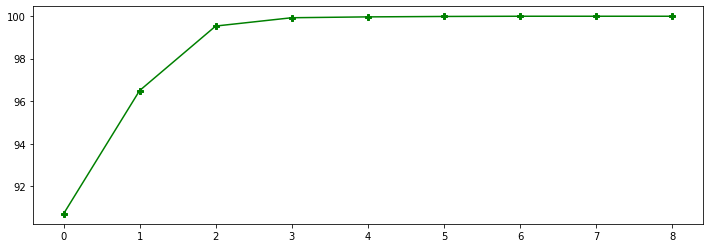

In [70]:
#variance plot for PCA componen obtained
plt.figure(figsize=(12,4))
plt.plot(var1,color="green",marker = "P");

In [74]:
data.shape

(517, 12)

In [75]:
pca_values.shape

(517, 9)

In [89]:
data_final = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['PC1','PC2','PC3']), data['size_category']], axis=1)
data_final

,PC1,PC2,PC3,size_category
0,461.747148,-6.745354,-1.179973,small
1,-105.454350,-21.588047,-95.141094,small
2,-124.411387,-21.488898,-90.246041,small
3,477.038978,-6.565341,11.636356,small
4,449.495258,-5.931597,24.983036,small
...,...,...,...,...
512,-105.949722,-13.423782,-74.351664,large
513,-106.448639,33.518303,-75.879635,large
514,-105.846197,-9.453399,-72.618731,large
515,-71.909911,-11.935742,23.621231,small


In [95]:
data_final.size_category.replace(('large','small'),(1,0),inplace = True)
data_final

,PC1,PC2,PC3,size_category
0,461.747148,-6.745354,-1.179973,0
1,-105.454350,-21.588047,-95.141094,0
2,-124.411387,-21.488898,-90.246041,0
3,477.038978,-6.565341,11.636356,0
4,449.495258,-5.931597,24.983036,0
...,...,...,...,...
512,-105.949722,-13.423782,-74.351664,1
513,-106.448639,33.518303,-75.879635,1
514,-105.846197,-9.453399,-72.618731,1
515,-71.909911,-11.935742,23.621231,0


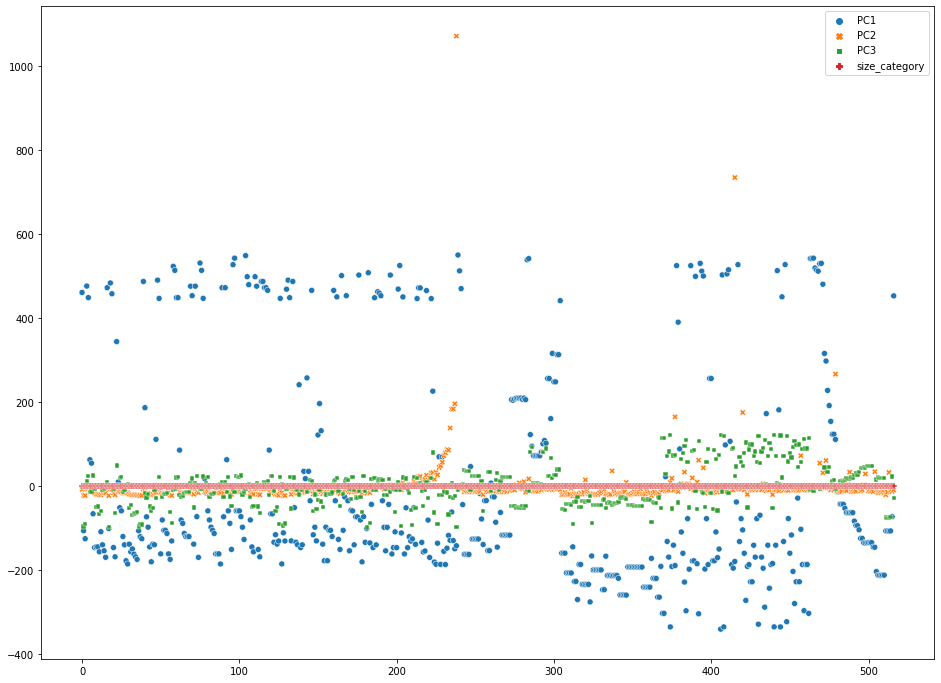

In [99]:
#visualization of PCA
fig = plt.figure (figsize =(16,12))
sns.scatterplot(data = data_final)

## Model Building

In [134]:
X = np.array(data_final.drop('size_category', axis = True))
y = np.array(data_final['size_category'])

In [135]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim =3, kernel_initializer='uniform', activation = 'relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [147]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, y, validation_split=0.3, epochs=80, batch_size=10)

Epoch 1/80
37/37 [==============================] - 3s 13ms/step - loss: 0.0243 - accuracy: 0.9917 - val_loss: 0.2834 - val_accuracy: 0.9231
Epoch 2/80
37/37 [==============================] - 0s 6ms/step - loss: 0.0480 - accuracy: 0.9806 - val_loss: 0.3362 - val_accuracy: 0.9038
Epoch 3/80
37/37 [==============================] - 0s 5ms/step - loss: 0.0278 - accuracy: 0.9917 - val_loss: 0.3861 - val_accuracy: 0.8974
Epoch 4/80
37/37 [==============================] - 0s 6ms/step - loss: 0.0353 - accuracy: 0.9806 - val_loss: 0.4123 - val_accuracy: 0.8910
Epoch 5/80
37/37 [==============================] - 0s 5ms/step - loss: 0.0310 - accuracy: 0.9861 - val_loss: 0.5091 - val_accuracy: 0.9038
Epoch 6/80
37/37 [==============================] - 0s 6ms/step - loss: 0.0232 - accuracy: 0.9917 - val_loss: 0.3690 - val_accuracy: 0.9038
Epoch 7/80
37/37 [==============================] - 0s 6ms/step - loss: 0.0219 - accuracy: 0.9917 - val_loss: 0.3963 - val_accuracy: 0.9038
Epoch 8/80
37/37 [=

In [149]:
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.1528 - accuracy: 0.9671
accuracy: 96.71%
